In [382]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import re

In [288]:
df = pd.read_csv("CX BA I Take Home - Ship Data - Take Home - Ship Data.csv")

# Part B

### Median age of women who went on excursions is 28.5 years old.

In [388]:
df[(df['went_excursion']==1) & (df['sex']=='female')]['age'].median()

28.5

## Double Letter

#### First I created a list called double_letter that is the length of the dataframe, and all values are 'false'. For the for_loops, the outside loop goes through every row in the dataframe; the inside loop goes through every letter in the name at the ith row, and checks if two adjacent letters are the same letter. If they are, then the ith position of the double_letter list is changed to 'true'.

#### When this loop ends, the list double letter is added to the dataframe. In this variable, 'true' means there is a double letter and 'false' means there is not. 

#### Note that edge cases of more than two adjacent letters are not checked since they are rarely going to appear. 

In [389]:
double_letter = ['false'] * len(df)
for row_i in list(range(len(df))):
    name = df['name'][row_i]
    for i in list(range(len(name)-1)):
        letter1 = name[i]
        letter2 = name[i+1]
        if letter1 == letter2: 
            double_letter[row_i] = 'true'
            break 

df['double_letter'] = double_letter

In [390]:
# double letter variable added 
df.head()

,name,sex,age,class,went_excursion,sibling_spouse,parent_child,double_letter
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,1,0,0,true
1,"Allison, Master. Hudson Trevor",male,0.9167,1,1,1,2,true
2,"Allison, Miss. Helen Loraine",female,2.0000,1,0,1,2,true
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,0,1,2,true
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",male,25.0000,1,0,1,2,true


## Unique titles

#### First, I created a dictionary to store the count for different titles. The outer for loop iterates through every row in the dataframe. The inner for loop iterates through the four titles. If a title is match in the name at ith row, then the count for that title adds one, and we stop the search (there should only be one title in each name). 

In [391]:
title = {'Mme':0,'Miss':0,'Master':0,'Mrs':0}

for row_i in list(range(len(df))):
    name = df['name'][row_i]
    for title_j in title:
        if re.search(title_j,name):
            title[title_j] +=1 
            break

#### There are 1 'Mme', 260 'Miss', 61 'Master' and 199 'Mrs'.

In [392]:
title

{'Mme': 1, 'Miss': 260, 'Master': 61, 'Mrs': 199}

# Part A

# Section #1 Trend 1

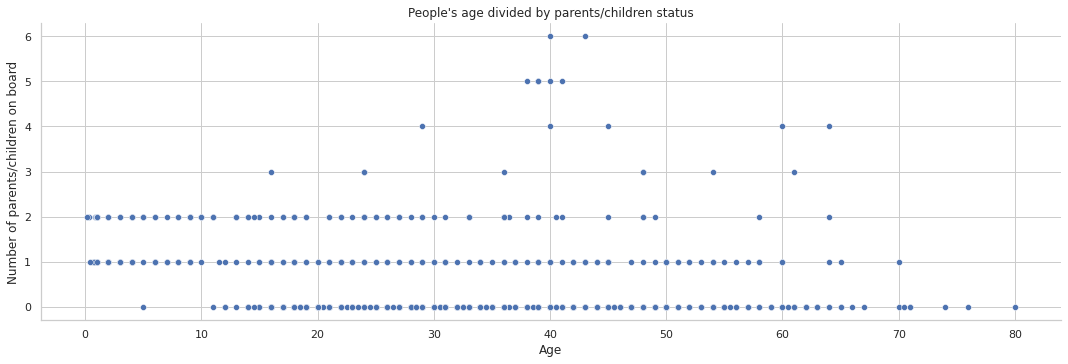

In [393]:
sns.set_theme(style="whitegrid")
sns.relplot(x='age',y='parent_child',palette = 'pastel',height=5,aspect=3,data=df[df['age'].notnull()==True])
plt.xlabel('Age')
plt.ylabel('Number of parents/children on board')
plt.title("People's age divided by parents/children status")
plt.show()

# Section #1 Trend #2

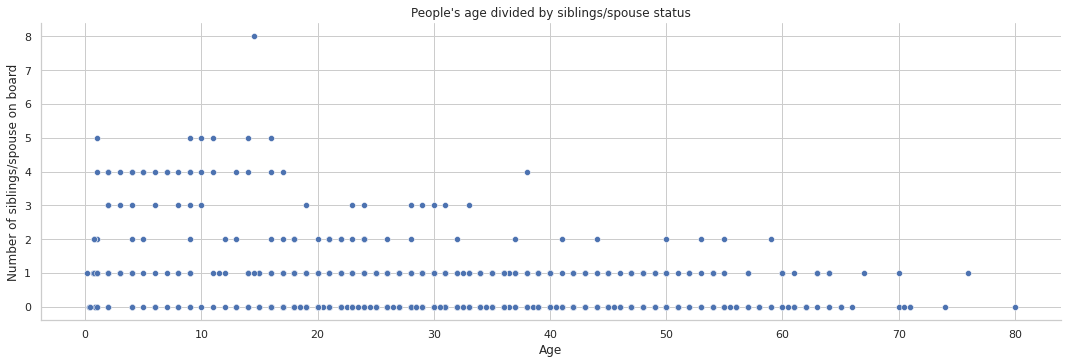

In [394]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid")
sns.relplot(x='age',y='sibling_spouse',palette = 'pastel',height=5,aspect=3,data=df[df['age'].notnull()==True])
plt.xlabel('Age')
plt.ylabel('Number of siblings/spouse on board')
plt.title("People's age divided by siblings/spouse status")
plt.show()

# Section #1 Trend #3

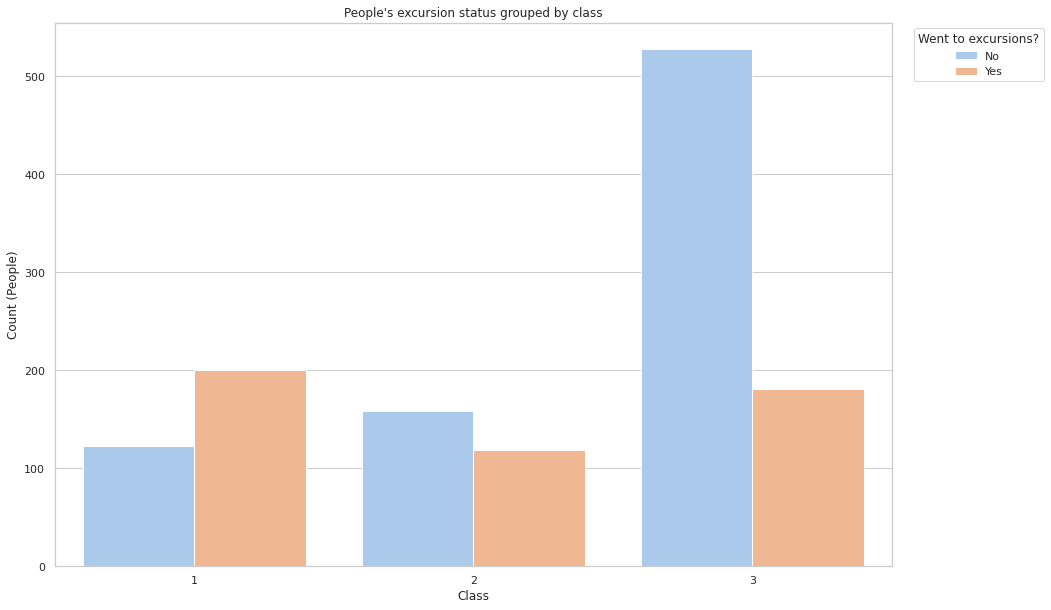

In [395]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
sns.countplot(x='class',hue='went_excursion',palette = 'pastel',data=df)
plt.legend(loc='upper left',title='Went to excursions?',labels = ["No","Yes"],bbox_to_anchor=(1.02, 1))
plt.xlabel('Class')
plt.ylabel('Count (People)')
plt.title("People's excursion status grouped by class")
plt.show()

# Section #2 

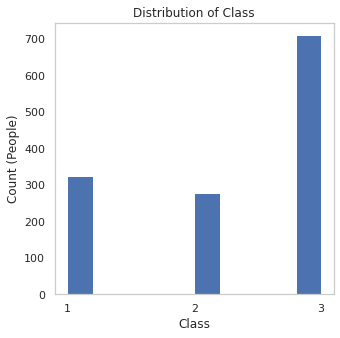

In [396]:
plt.figure(figsize=(5,5))
ax=df['class'].astype(str).hist()
ax.grid(False)
plt.xlabel('Class')
plt.ylabel('Count (People)')
plt.title("Distribution of Class")
plt.show()

# Section #3 Visualization #1

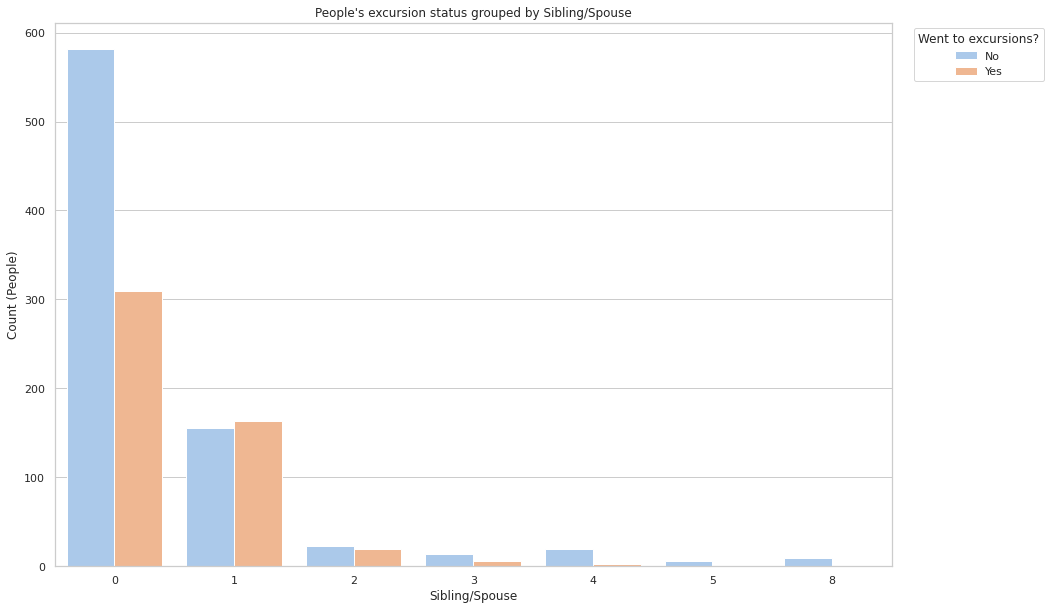

In [398]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
sns.countplot(x='sibling_spouse',hue='went_excursion',palette = 'pastel',data=df)
plt.legend(loc='upper left',title='Went to excursions?',labels = ["No","Yes"],bbox_to_anchor=(1.02, 1))
plt.xlabel('Sibling/Spouse')
plt.ylabel('Count (People)')
plt.title("People's excursion status grouped by Sibling/Spouse")
plt.show()

### Lineplot
#### Calculate count of people for each sibling_spouse/went_excursion combination

In [399]:
df0=df.groupby(['sibling_spouse','went_excursion']).count()
df0

name  sex  age  class  parent_child  \
sibling_spouse went_excursion                                        
0              0                582  582  430    582           582   
               1                309  309  255    309           309   
1              0                156  156  133    156           156   
               1                163  163  147    163           163   
2              0                 23   23   20     23            23   
               1                 19   19   16     19            19   
3              0                 14   14   10     14            14   
               1                  6    6    6      6             6   
4              0                 19   19   19     19            19   
               1                  3    3    3      3             3   
5              0                  6    6    6      6             6   
8              0                  9    9    1      9             9   

                               double_letter  
sibling_spouse went_excursion                 
0              0                         582  
               1                         309  
1              0                         156  
               1                         163  
2              0                          23  
               1                          19  
3              0                          14  
               1                           6  
4              0                          19  
               1                           3  
5              0                           6  
8              0                           9

In [400]:
sibling_spouse=[0,0,1,1,2,2,3,3,4,4,5,8]
went_excursion=[0,1,0,1,0,1,0,1,0,1,0,0]
people=[582,309,156,163,23,19,14,6,19,3,6,9]
df1=pd.DataFrame(list(zip(sibling_spouse,went_excursion,people)),columns=['sibling_spouse','went_excursion','people'])

In [401]:
df1

,sibling_spouse,went_excursion,people
0,0,0,582
1,0,1,309
2,1,0,156
3,1,1,163
4,2,0,23
5,2,1,19
6,3,0,14
7,3,1,6
8,4,0,19
9,4,1,3


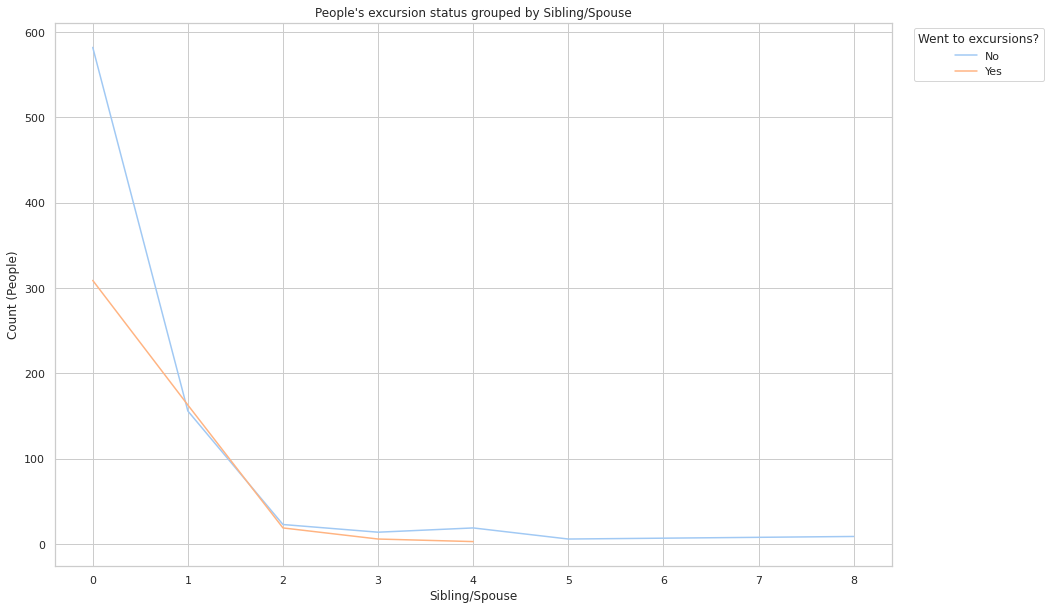

In [403]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
sns.lineplot(x='sibling_spouse',y='people',hue='went_excursion',palette = 'pastel',data=df1)
plt.legend(loc='upper left',title='Went to excursions?',labels = ["No","Yes"],bbox_to_anchor=(1.02, 1))
plt.xlabel('Sibling/Spouse')
plt.ylabel('Count (People)')
plt.title("People's excursion status grouped by Sibling/Spouse")
plt.show()

# Section #3 Visualization #2

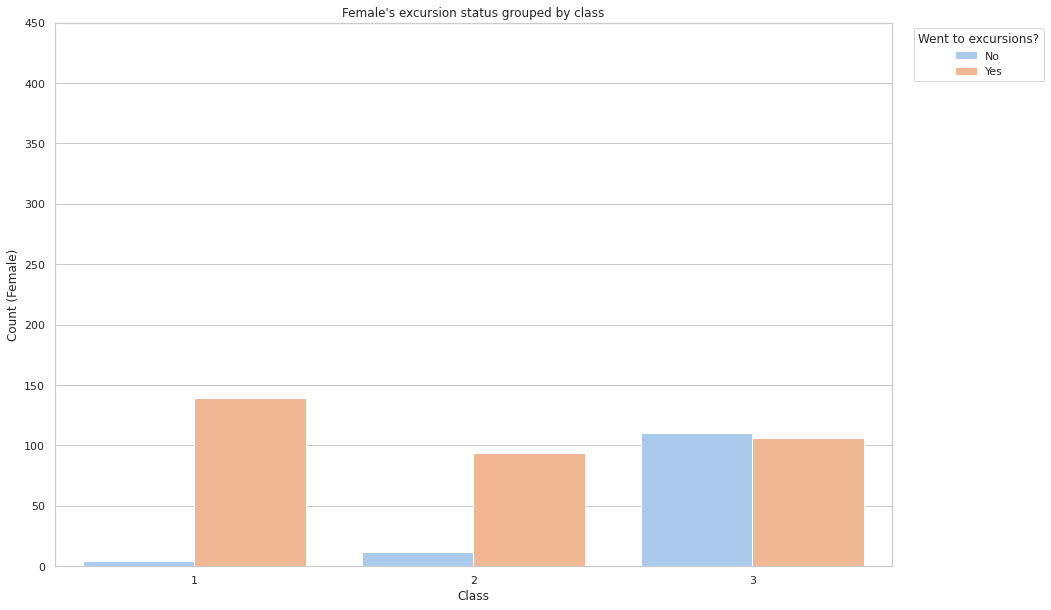

In [404]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
sns.countplot(x='class',hue='went_excursion',palette = 'pastel',data=df[df['sex']=='female'])
plt.legend(loc='upper left',title='Went to excursions?',labels = ["No","Yes"],bbox_to_anchor=(1.02, 1))
plt.xlabel('Class')
plt.ylabel('Count (Female)')
plt.ylim(0, 450)
plt.title("Female's excursion status grouped by class")
plt.show()

Text(0.5, 1.0, "Male's excursion status grouped by class")

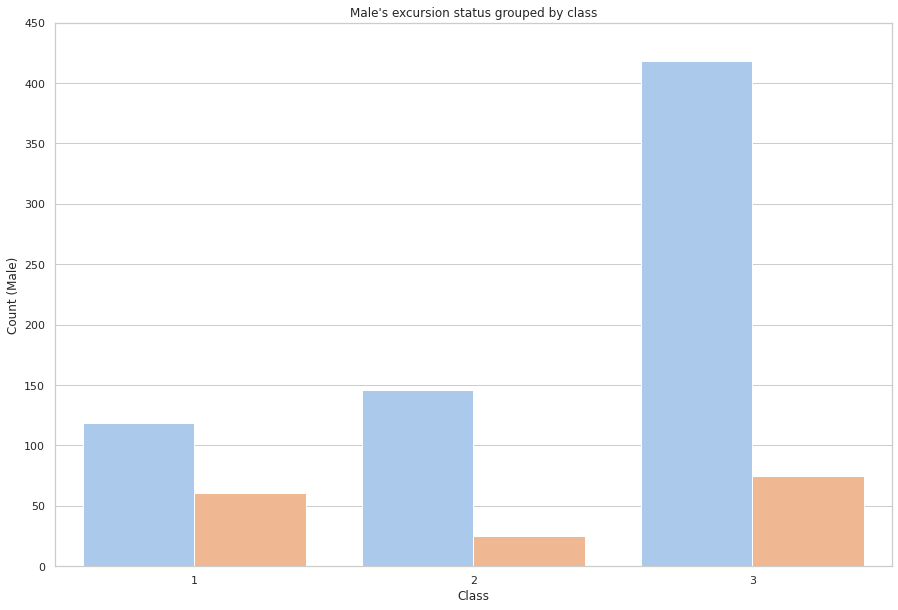

In [405]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
sns.countplot(x='class',hue='went_excursion',palette = 'pastel',data=df[df['sex']=='male'])
plt.legend([],[],frameon=False)
plt.xlabel('Class')
plt.ylabel('Count (Male)')
plt.ylim(0, 450)
plt.title("Male's excursion status grouped by class")